## Utils

Function to load data about learning statistic

In [36]:
import pandas as pd
from pathlib import Path

def load_local_data(project_name):
    current_dir = Path.cwd()
    script_dir = current_dir.parent / "policies" / "PPO" / f"{ENVMODEL}" / "wandb_download"
    project_path = script_dir / project_name
    print(f"Loading project {project_name}".center(100, "="))
    print(f"Loading files from {project_path}")
    
    if not project_path.exists():
        print(f"Directory {project_path} non trovata!")
        return pd.DataFrame()
    
    # Recuperiamo tutti i file .parquet nella sottocartella del progetto
    files = list(project_path.glob("*.parquet"))
    print(f"Loading {len(files)} run from {project_path}...")
    
    dfs = []
    for f in files:
        df_run = pd.read_parquet(f)
        dfs.append(df_run)
    
    if not dfs:
        return pd.DataFrame()
        
    # Concateniamo tutto in un unico DataFrame
    full_df = pd.concat(dfs, ignore_index=True)
    print(f"{project_name} loaded succesfully.\n")
    return full_df

Function to plot and compare statistics about the two different learning approaches

In [57]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import pandas as pd

def plot_rl_analysis(data_dict, groups_to_plot):
    # Project constants
    METRICS = [
        "Testing_success_rate_per_episode", 
        "Testing_reward_per_episode", 
        "Testing_steps_per_episode"
    ]
    SIGMA = 2
    
    n_rows = len(data_dict)
    n_cols = len(METRICS)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2.5 * n_rows))
    
    if n_rows == 1: axes = axes.reshape(1, -1)

    for row_idx, (row_title, df) in enumerate(data_dict.items()):
        for col_idx, metric in enumerate(METRICS):
            ax = axes[row_idx, col_idx]
            
            for group_name in groups_to_plot:
                # Filter and aggregate
                group_df = df[df["run_group"] == group_name]
                if group_df.empty: continue
                
                mean_series = group_df.groupby("Episodes")[metric].mean()
                
                # Apply smoothing
                y_smooth = gaussian_filter1d(mean_series.values, sigma=SIGMA)
                ax.plot(mean_series.index, y_smooth, label=group_name)
            
            # Subplot styling
            ax.set_title(f"{row_title}")
            ax.set_ylabel(f"{metric.split('per_episode')[0].replace('_', ' ')}")
            ax.set_xlabel("Episodes")
            ax.legend()
            ax.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout()
    return fig

# ENV6 (MDP)  
## 2 agents, comparison strict self play - loose self play

In [38]:
USERNAME = "299011-unimore"
ENVMODEL="env_6_mdp"
PROJECT_STRICT = "gridworld_strictplay_2agents"
PROJECT_LOOSE = "gridworld_looseplay_2agents"
all_runs_strict = load_local_data(PROJECT_STRICT)
all_runs_loose = load_local_data(PROJECT_LOOSE)

============================Loading project gridworld_strictplay_2agents============================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_strictplay_2agents
Loading 6 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_strictplay_2agents...
gridworld_strictplay_2agents loaded succesfully.

============================Loading project gridworld_looseplay_2agents=============================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_looseplay_2agents
Loading 6 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_looseplay_2agents...
gridworld_looseplay_2agents loaded succesfully.



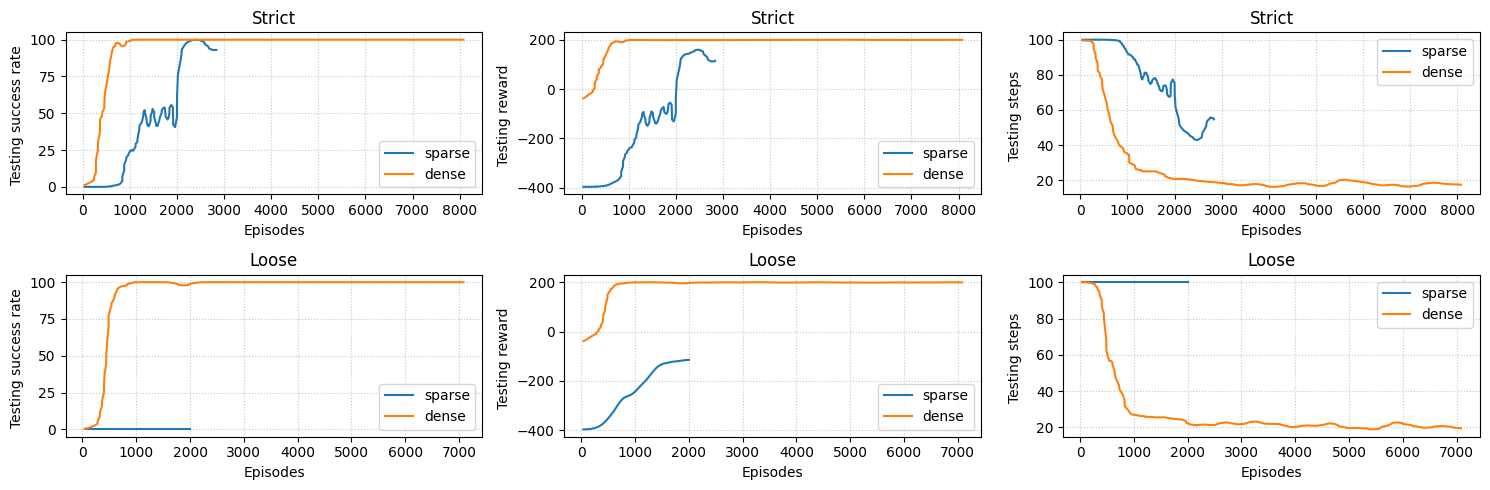

In [58]:
GROUPS = ["sparse", "dense"] 
DATA_TO_PLOT = {
    "Strict": all_runs_strict,
    "Loose": all_runs_loose
}

plot_rl_analysis(DATA_TO_PLOT, GROUPS)
plt.show()

# 4 agents, comparison strict self play - loose self play

In [59]:
USERNAME = "299011-unimore"
ENVMODEL="env_6_mdp"
PROJECT_STRICT = "gridworld_strictplay_4agents"
PROJECT_LOOSE = "gridworld_looseplay_4agents"
all_runs_strict = load_local_data(PROJECT_STRICT)
all_runs_loose = load_local_data(PROJECT_LOOSE)

============================Loading project gridworld_strictplay_4agents============================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_strictplay_4agents
Loading 6 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_strictplay_4agents...
gridworld_strictplay_4agents loaded succesfully.

============================Loading project gridworld_looseplay_4agents=============================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_looseplay_4agents
Loading 6 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_6_mdp/wandb_download/gridworld_looseplay_4agents...
gridworld_looseplay_4agents loaded succesfully.



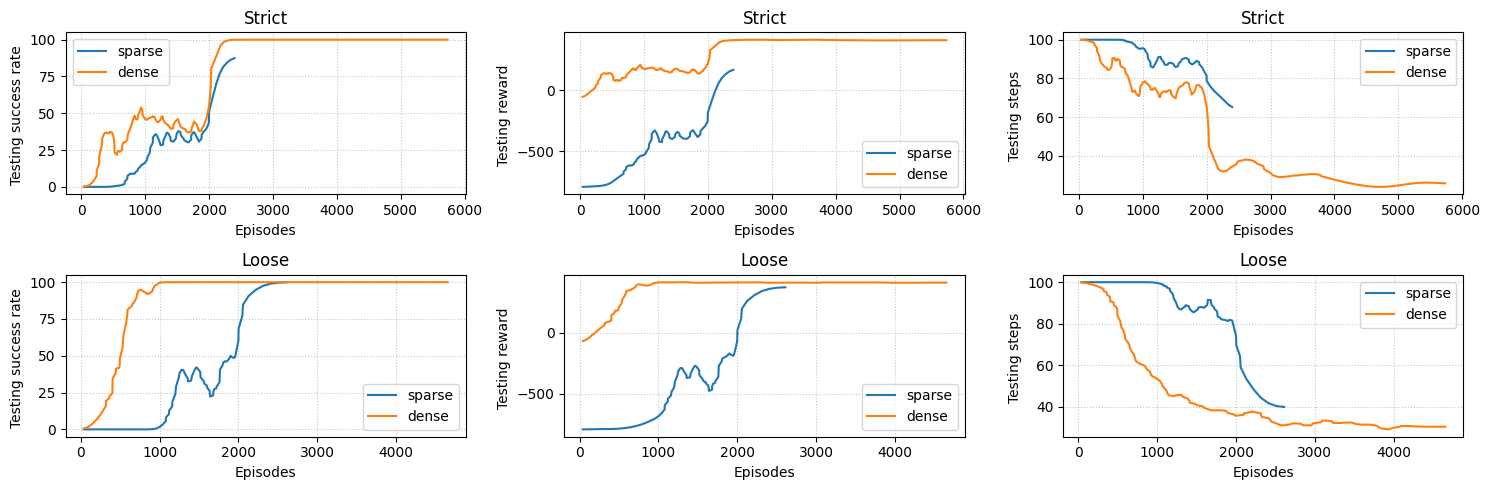

In [60]:
GROUPS = ["sparse", "dense"] 
DATA_TO_PLOT = {
    "Strict": all_runs_strict,
    "Loose": all_runs_loose
}

plot_rl_analysis(DATA_TO_PLOT, GROUPS)
plt.show()

# ENV7 (POMDP)
## 2 agents, comparison strict self play - loose self play

In [61]:
USERNAME = "299011-unimore"
ENVMODEL="env_7_pomdp_radius2"
PROJECT_STRICT = "gridworld_pomdp_strictplay_2agents_radius2"
PROJECT_LOOSE = "gridworld_pomdp_looseplay_2agents_radius2"
all_runs_strict = load_local_data(PROJECT_STRICT)
all_runs_loose = load_local_data(PROJECT_LOOSE)

=====================Loading project gridworld_pomdp_strictplay_2agents_radius2=====================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_strictplay_2agents_radius2
Loading 1 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_strictplay_2agents_radius2...
gridworld_pomdp_strictplay_2agents_radius2 loaded succesfully.

=====================Loading project gridworld_pomdp_looseplay_2agents_radius2======================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_looseplay_2agents_radius2
Loading 1 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_looseplay_2agents_radius2...
gridworld_pomdp_looseplay_2agents_radius2 loaded succesful

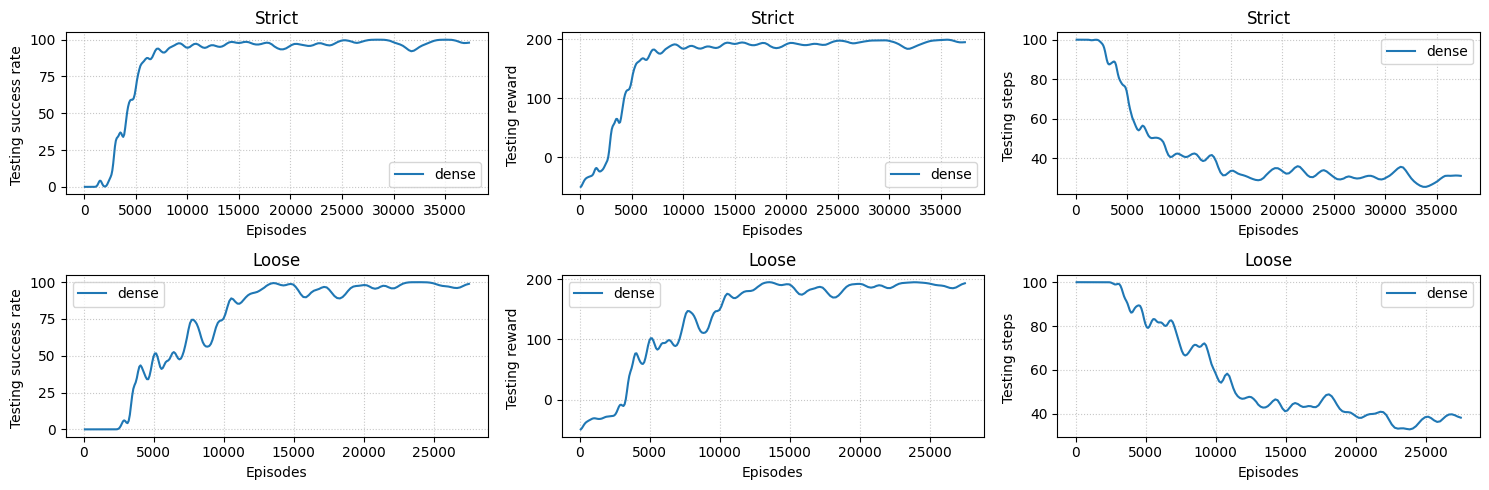

In [62]:
GROUPS = ["sparse", "dense"] 
DATA_TO_PLOT = {
    "Strict": all_runs_strict,
    "Loose": all_runs_loose
}

plot_rl_analysis(DATA_TO_PLOT, GROUPS)
plt.show()

## 4 agents, comparison strict self play - loose self play

In [63]:
USERNAME = "299011-unimore"
ENVMODEL="env_7_pomdp_radius2"
PROJECT_STRICT = "gridworld_pomdp_strictplay_4agents_radius2"
PROJECT_LOOSE = "gridworld_pomdp_looseplay_4agents_radius2"
all_runs_strict = load_local_data(PROJECT_STRICT)
all_runs_loose = load_local_data(PROJECT_LOOSE)

=====================Loading project gridworld_pomdp_strictplay_4agents_radius2=====================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_strictplay_4agents_radius2
Loading 1 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_strictplay_4agents_radius2...
gridworld_pomdp_strictplay_4agents_radius2 loaded succesfully.

=====================Loading project gridworld_pomdp_looseplay_4agents_radius2======================
Loading files from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_looseplay_4agents_radius2
Loading 1 run from /home/terra/Desktop/magistrale/distributed_ai_project/src/policies/PPO/env_7_pomdp_radius2/wandb_download/gridworld_pomdp_looseplay_4agents_radius2...
gridworld_pomdp_looseplay_4agents_radius2 loaded succesful

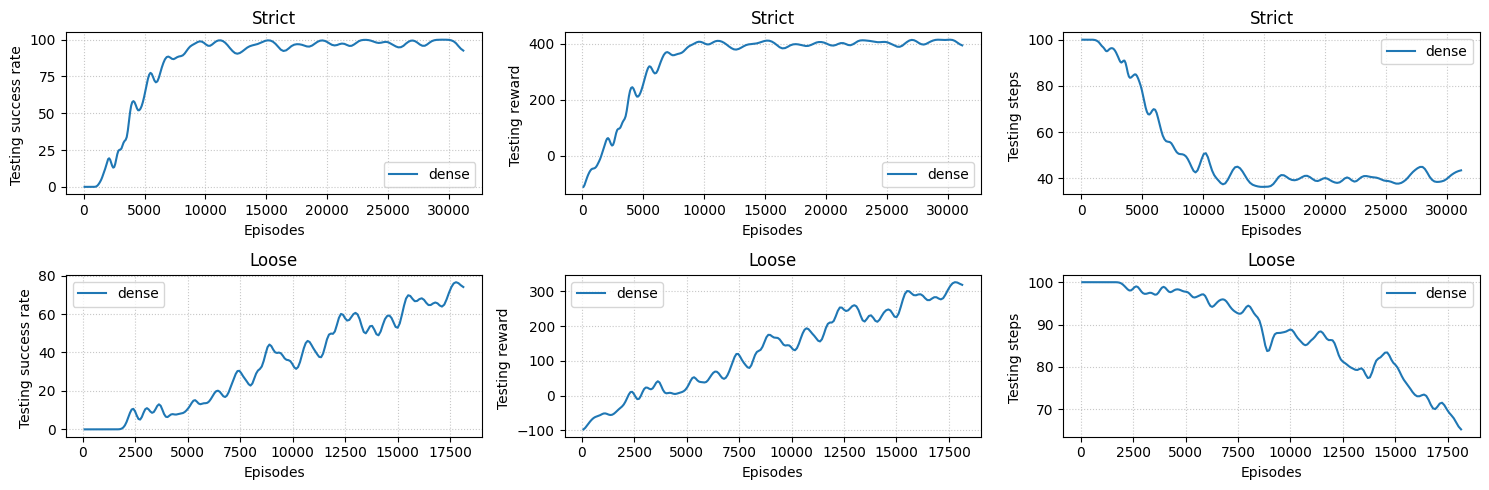

In [64]:
GROUPS = ["sparse", "dense"] 
DATA_TO_PLOT = {
    "Strict": all_runs_strict,
    "Loose": all_runs_loose
}

plot_rl_analysis(DATA_TO_PLOT, GROUPS)
plt.show()